   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


<Figure size 640x480 with 0 Axes>

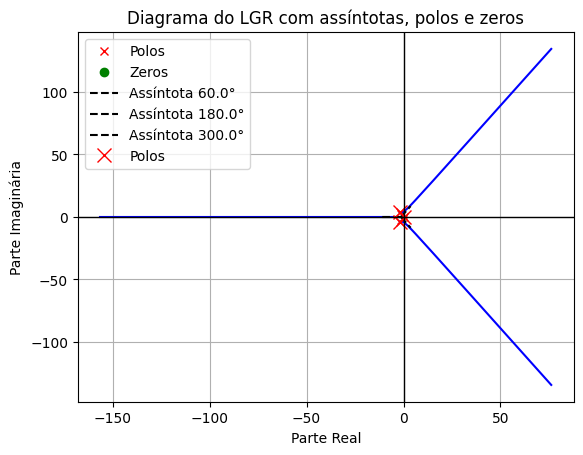

In [1]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Coeficientes do numerador e denominador da FT com ganho k
num = [10]  # numerador com ganho k

# Adiciona o polo em s=0 multiplicando o denominador por s
den = [1, 4, 18, 0]  # adiciona o termo 0 no final para o polo em s=0

# Criar a função de transferência
plt.figure()
G = ctrl.TransferFunction(num, den)

# Calcular o LGR sem automaticamente plotar
rlist, klist = ctrl.root_locus(G, plot=False)

# Plotar os polos, zeros e o LGR
plt.figure()
plt.plot(np.real(rlist), np.imag(rlist), 'b')  # LGR
plt.plot(np.real(G.poles()), np.imag(G.poles()), 'rx', label="Polos")  # Polos iniciais
plt.plot(np.real(G.zeros()), np.imag(G.zeros()), 'go', label="Zeros")  # Zeros finais (se houver)

# Parâmetros das assíntotas
n_p = len(G.poles())  # Número de polos
n_z = len(G.zeros())  # Número de zeros
centroid = (np.sum(G.poles()) - np.sum(G.zeros())) / (n_p - n_z)  # Centroide
angles = [(180 * (2 * k + 1)) / (n_p - n_z) for k in range(n_p - n_z)]  # Ângulos das assíntotas

# Desenhar as assíntotas
for angle in angles:
    plt.plot([np.real(centroid), np.real(centroid) + 10 * np.cos(np.deg2rad(angle))],
             [0, 10 * np.sin(np.deg2rad(angle))], 'k--', label=f'Assíntota {angle}°')

# Adicionar os polos e zeros manualmente
plt.plot(np.real(G.poles()), np.imag(G.poles()), 'rx', markersize=10, label="Polos")  # Polos iniciais
if len(G.zeros()) > 0:
    plt.plot(np.real(G.zeros()), np.imag(G.zeros()), 'go', markersize=10, label="Zeros")  # Zeros (se houver)

# Configurações do gráfico
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Diagrama do LGR com assíntotas, polos e zeros")
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid(True)
plt.legend()
plt.show()




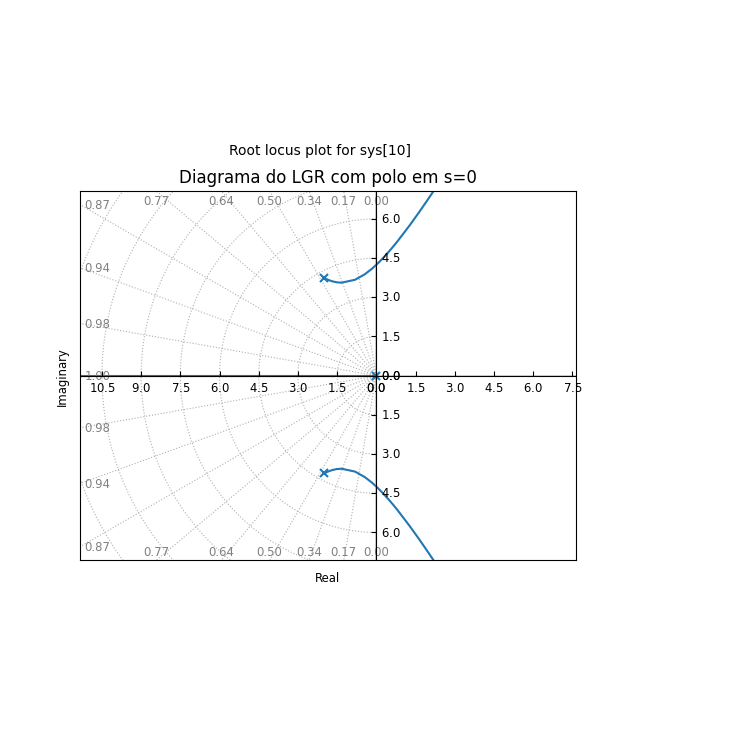

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Coeficientes do numerador e denominador da FT com ganho k
num = [10]  # numerador com ganho k

# Adiciona o polo em s=0 multiplicando o denominador por s
den = [1, 4, 18, 0]  # adiciona o termo 0 no final para o polo em s=0

# Criar a função de transferência
G = ctrl.TransferFunction(num, den)

# Plotar o LGR
ctrl.root_locus(G)
plt.title("Diagrama do LGR com polo em s=0")
plt.grid(True)
plt.show()
